# Transferencia del modelo de abandono
## Conceptos básicos del Análisis de Supervivencia

## Análisis de datos exploratorio

## Caso: Veterans' Administration Lung Cancer study

Ensayo aleatorizado de dos regímenes de tratamiento para el cáncer de pulmón. Este es un conjunto de datos de análisis de supervivencia estándar.https://rdrr.io/cran/survival/man/veteran.html

__Sigificado de los campos__

__trt__:	1=standard 2=test  Grupo placebo y otro de prueba / nominal

__celltype__:	1=squamous, 2=smallcell, 3=adeno, 4=large     / nominal

__time__:	survival time   (días de supervivencia)           / razón

__status__:	censoring status  / nominal

__karno__:	Karnofsky performance score (100=good)       / ordinal

A standard way of measuring the ability of cancer patients to perform ordinary tasks. The Karnofsky Performance Status scores range from 0 to 100. A higher score means the patient is better able to carry out daily activities.

"The scoring is subjectively assigned by a health professional based on the following hierarchical scale: 100=normal, no evidence of disease; 90=able to perform normal activity with only minor symptoms; 80=normal activity with effort, some symptoms; 70=able to care for self but unable to do normal activities; 60=requires occasional assistance, care for most needs; 50=requires considerable assistance; 40=disabled, requires special assistance; 30=severely disabled; 20=very sick, requires active supportive treatment; 10=moribund. Intermediate or even decimal scores can be assigned. The tool is named after David A. Karnofsky, who described the scale in 1949."(Ferrucci et.all,2007)

<div class="csl-entry">Ferrucci, L., Koh, C., Bandinelli, S., &#38; Guralnik, J. M. (2007). Disability, Functional Status, and Activities of Daily Living. <i>Encyclopedia of Gerontology</i>, 427–436. https://doi.org/10.1016/B0-12-370870-2/00075-5</div>

__diagtime__:	months from diagnosis to randomisation   / razón

__age__:	in years                    /razón

__prior__:	prior therapy 0=no, 10=yes  / nominal

__Source__
D Kalbfleisch and RL Prentice (1980), The Statistical Analysis of Failure Time Data. Wiley, New York.

## Preguntas de investigación

1. ¿Qué grupo de tratamiento tiene mayor tasa de supervivencia después de 1 año (365 días)?
2. ¿Cuál es el estimado de supervivencia de los veteranos, independientemente del tratamiento, a través de los primeros 200 días?
3. ¿Puedo predecir con más de 0.65 de concordancia la probabilidad y el riesgo de supervivencia de un veterano conociendo 'trt', 'celltype', 'time', 'status', 'karno', 'diagtime', 'age' y 'prior'?

### Unidad de observación

+ Cada fila de la tabla: veterano con cáncer de pulmón ...

### Unidad de análisis

| __Pregunta de investigación__ | __Unidad de análisis__ |          |
| ------------------------- | ------------------ | -------- |
| trt con superv. después 1 | grupo tratamiento |          | 
| ------------------------- | ------------------ | -------- |
| supervivencia en 200 días | veterano           |          |
| ------------------------- | ------------------ | -------- |


In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import lifelines

In [4]:
# Para obtener múltiples salidas de una celda
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
# This class implements an Exponential model for univariate data
from lifelines import ExponentialFitter

In [6]:
!jupyter nbextension enable --py widgetsnbextension

"jupyter" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [7]:
import pandas_profiling
from pandas_profiling import ProfileReport


C:\Users\david\AppData\Local\Temp\ipykernel_19636\2422047741.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [8]:
df = pd.read_csv('dataset-25346.csv',encoding='utf-8')
# 'latin-1'

In [9]:
df_backup = df.copy()

In [10]:
import matplotlib.pyplot as plt

In [11]:
import seaborn as sns

In [12]:
df

,trt,celltype,time,status,karno,diagtime,age,prior
0,1,squamous,72,1,60,7,69,0
1,1,squamous,411,1,70,5,64,10
2,1,squamous,228,1,60,3,38,0
3,1,squamous,126,1,60,9,63,10
4,1,squamous,118,1,70,11,65,10
...,...,...,...,...,...,...,...,...
132,2,large,133,1,75,1,65,0
133,2,large,111,1,60,5,64,0
134,2,large,231,1,70,18,67,10
135,2,large,378,1,80,4,65,0


In [13]:
# Lista de nombres de columnas
col = df.columns
col


Index(['trt', 'celltype', 'time', 'status', 'karno', 'diagtime', 'age',
       'prior'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   trt       137 non-null    int64 
 1   celltype  137 non-null    object
 2   time      137 non-null    int64 
 3   status    137 non-null    int64 
 4   karno     137 non-null    int64 
 5   diagtime  137 non-null    int64 
 6   age       137 non-null    int64 
 7   prior     137 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 8.7+ KB


In [15]:
nominales = ['trt', 'celltype', 'status','prior']
ordinales = ['karno']
#intervalo
razon = ['time', 'diagtime', 'age']

In [16]:
#df['trt_cat'] = df['trt'].astype('category')
#df.info()

In [17]:
for i in nominales:
    df[i] = df[i].astype('category')
    

In [18]:
#df.celltype = df.celltype.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   trt       137 non-null    category
 1   celltype  137 non-null    category
 2   time      137 non-null    int64   
 3   status    137 non-null    category
 4   karno     137 non-null    int64   
 5   diagtime  137 non-null    int64   
 6   age       137 non-null    int64   
 7   prior     137 non-null    category
dtypes: category(4), int64(4)
memory usage: 5.5 KB


## Análisis univariado visual y no visual

Para lo visual puede usar como guía la siguiente imagen

<div>
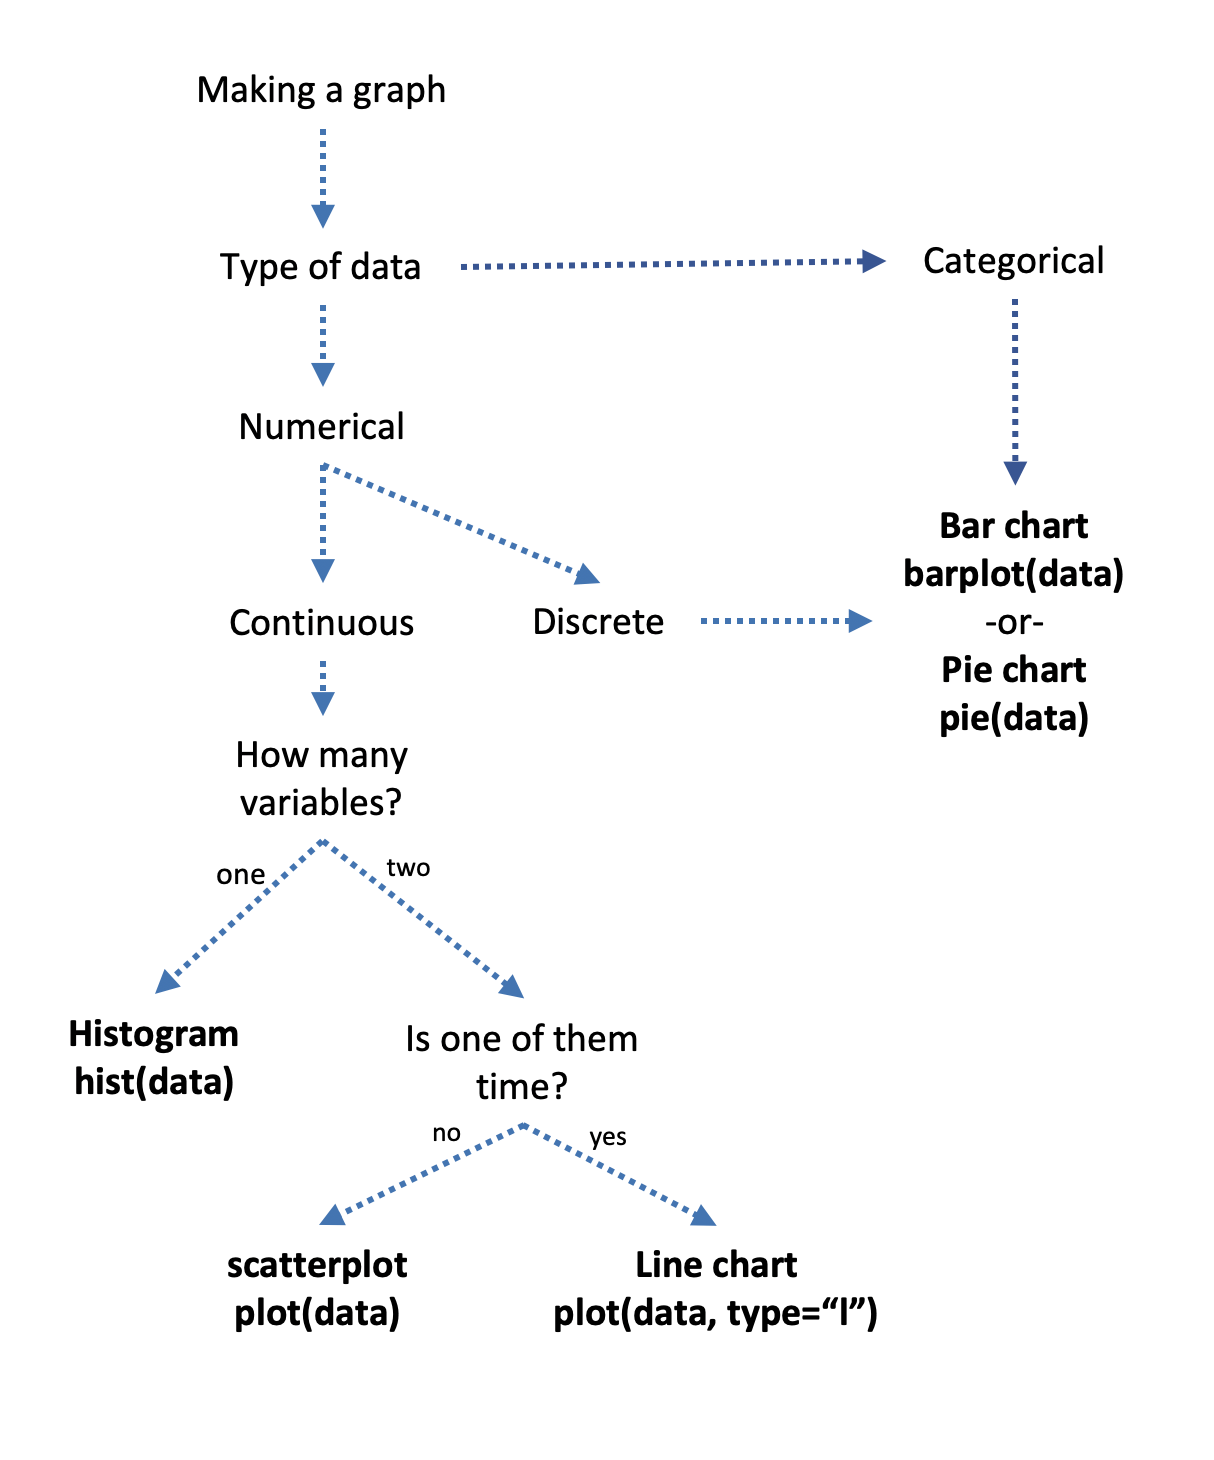
</div>

In [19]:
Image.resize?

Object `Image.resize` not found.


In [20]:
from IPython import display
display.Image(r'C:\Users\ghernand\Documents\ProgramacionAnaliticaDatos\grafica_por_tipo_escala_estadistica.png',width = 600, height = 300)


FileNotFoundError: No such file or directory: 'C:\Users\ghernand\Documents\ProgramacionAnaliticaDatos\grafica_por_tipo_escala_estadistica.png'

FileNotFoundError: No such file or directory: 'C:\Users\ghernand\Documents\ProgramacionAnaliticaDatos\grafica_por_tipo_escala_estadistica.png'

<IPython.core.display.Image object>

In [ ]:
# Explorar si son de alta o baja cardinalidad
for i in nominales + ordinales:
    print(i)
    df[i].unique()
    print()
    

trt


[1, 2]
Categories (2, int64): [1, 2]


celltype


['squamous', 'smallcell', 'adeno', 'large']
Categories (4, object): ['adeno', 'large', 'smallcell', 'squamous']


status


[1, 0]
Categories (2, int64): [0, 1]


prior


[0, 10]
Categories (2, int64): [0, 10]


karno


array([60, 70, 20, 40, 80, 50, 30, 75, 90, 85, 99, 10], dtype=int64)

### Hallazgo

+ Todas las nominales pueden ser consideradas de baja cardinalidad
+ karno, que es ordinal, es de alta cardinalidad

In [21]:
df.celltype.value_counts()

smallcell    48
squamous     35
adeno        27
large        27
Name: celltype, dtype: int64

In [22]:
df.celltype.value_counts(normalize=True)

smallcell    0.350365
squamous     0.255474
adeno        0.197080
large        0.197080
Name: celltype, dtype: float64

### Hallazgos
+ No hay desbalance severo entre las muestras de cada tipo de célula
+ La mayoría de los veteranos tiene cáncer de pulmón de célula pequeña

<AxesSubplot: >

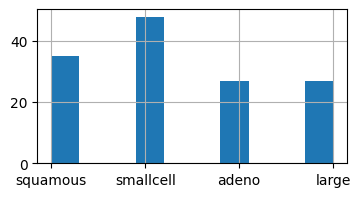

In [23]:
fig,ax = plt.subplots(figsize=(4,2))
df.celltype.hist()

In [24]:
for i in nominales + ordinales:
    print(i)
    df[i].describe()
    print()

trt


count     137
unique      2
top         1
freq       69
Name: trt, dtype: int64


celltype


count           137
unique            4
top       smallcell
freq             48
Name: celltype, dtype: object


status


count     137
unique      2
top         1
freq      128
Name: status, dtype: int64


prior


count     137
unique      2
top         0
freq       97
Name: prior, dtype: int64


karno


count    137.000000
mean      58.569343
std       20.039592
min       10.000000
25%       40.000000
50%       60.000000
75%       75.000000
max       99.000000
Name: karno, dtype: float64

<AxesSubplot: xlabel='karno'>

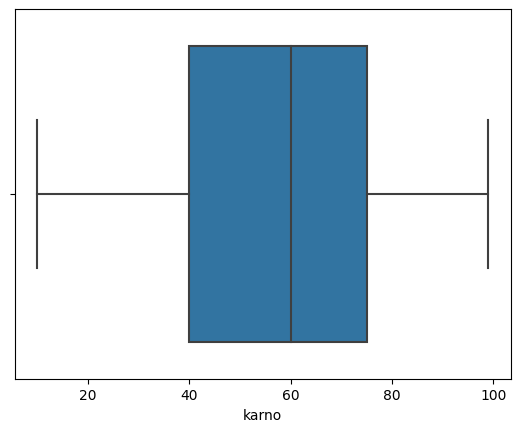

In [25]:
#df.karno.plot.box()
sns.boxplot(x=df.karno)

In [26]:
for i in nominales + ordinales:
    print(i)
    df[i].value_counts()
    print()

trt


1    69
2    68
Name: trt, dtype: int64


celltype


smallcell    48
squamous     35
adeno        27
large        27
Name: celltype, dtype: int64


status


1    128
0      9
Name: status, dtype: int64


prior


0     97
10    40
Name: prior, dtype: int64


karno


60    27
80    24
70    23
40    16
50    14
30    14
20     7
90     7
75     2
85     1
99     1
10     1
Name: karno, dtype: int64

In [27]:
df.karno.mode()

0    60
Name: karno, dtype: int64

In [29]:
plt.subplots?

Signature:
plt.subplots(
    nrows=1,
    ncols=1,
    *,
    sharex=False,
    sharey=False,
    squeeze=True,
    width_ratios=None,
    height_ratios=None,
    subplot_kw=None,
    gridspec_kw=None,
    **fig_kw,
)
Docstring:
Create a figure and a set of subplots.

This utility wrapper makes it convenient to create common layouts of
subplots, including the enclosing figure object, in a single call.

Parameters
----------
nrows, ncols : int, default: 1
    Number of rows/columns of the subplot grid.

sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
    Controls sharing of properties among x (*sharex*) or y (*sharey*)
    axes:

    - True or 'all': x- or y-axis will be shared among all subplots.
    - False or 'none': each subplot x- or y-axis will be independent.
    - 'row': each subplot row will share an x- or y-axis.
    - 'col': each subplot column will share an x- or y-axis.

    When subplots have a shared x-axis along a column, only the x tick
    labels

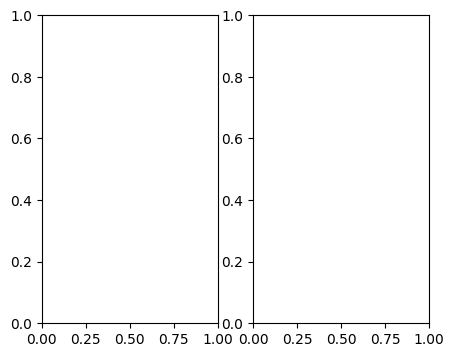

In [31]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(5,4))

In [ ]:
sns.histplot?

<AxesSubplot:xlabel='celltype', ylabel='Count'>

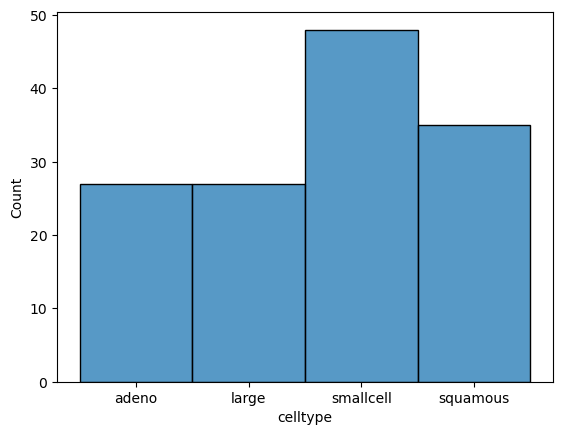

In [ ]:
sns.histplot(data=df,x=df.celltype)

(array([35.,  0.,  0., 48.,  0.,  0., 27.,  0.,  0., 27.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

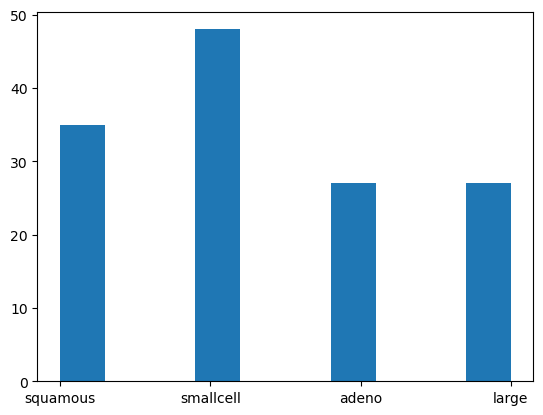

In [ ]:
plt.hist(df.celltype)

(array([35.,  0.,  0., 48.,  0.,  0., 27.,  0.,  0., 27.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Histogramas')

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

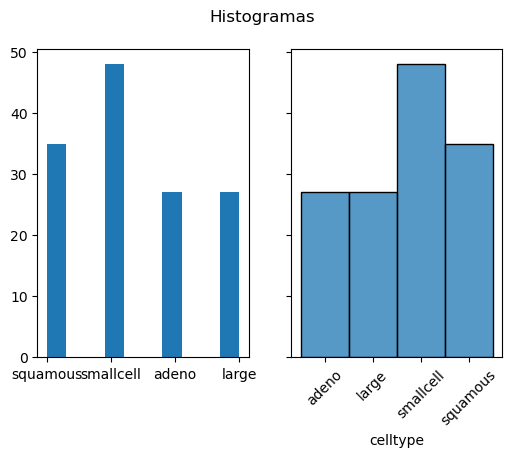

In [ ]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(6,4),sharey=True)
axs[0].hist(df.celltype)
axs[1] = sns.histplot(data=df,x=df.celltype)
plt.suptitle('Histogramas')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#df.celltype.hist?

## Conversión a dummy

In [32]:
pd.get_dummies?

Signature:
pd.get_dummies(
    data,
    prefix=None,
    prefix_sep='_',
    dummy_na: 'bool' = False,
    columns=None,
    sparse: 'bool' = False,
    drop_first: 'bool' = False,
    dtype: 'Dtype | None' = None,
) -> 'DataFrame'
Docstring:
Convert categorical variable into dummy/indicator variables.

Parameters
----------
data : array-like, Series, or DataFrame
    Data of which to get dummy indicators.
prefix : str, list of str, or dict of str, default None
    String to append DataFrame column names.
    Pass a list with length equal to the number of columns
    when calling get_dummies on a DataFrame. Alternatively, `prefix`
    can be a dictionary mapping column names to prefixes.
prefix_sep : str, default '_'
    If appending prefix, separator/delimiter to use. Or pass a
    list or dictionary as with `prefix`.
dummy_na : bool, default False
    Add a column to indicate NaNs, if False NaNs are ignored.
columns : list-like, default None
    Column names in the DataFrame to be e

In [35]:
df_dum = pd.get_dummies(df,drop_first=True)
df_dum

,time,karno,diagtime,age,trt_2,celltype_large,celltype_smallcell,celltype_squamous,status_1,prior_10
0,72,60,7,69,0,0,0,1,1,0
1,411,70,5,64,0,0,0,1,1,1
2,228,60,3,38,0,0,0,1,1,0
3,126,60,9,63,0,0,0,1,1,1
4,118,70,11,65,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
132,133,75,1,65,1,1,0,0,1,0
133,111,60,5,64,1,1,0,0,1,0
134,231,70,18,67,1,1,0,0,1,1
135,378,80,4,65,1,1,0,0,1,0


In [38]:
pd.get_dummies(df[['trt','prior']],drop_first=True)

,trt_2,prior_10
0,0,0
1,0,1
2,0,0
3,0,1
4,0,1
...,...,...
132,1,0
133,1,0
134,1,1
135,1,0


In [39]:
type(df)

pandas.core.frame.DataFrame

In [40]:
type(df.iloc[1])

pandas.core.series.Series

In [41]:
df_1 = df[df.trt ==1]
df_1

,trt,celltype,time,status,karno,diagtime,age,prior
0,1,squamous,72,1,60,7,69,0
1,1,squamous,411,1,70,5,64,10
2,1,squamous,228,1,60,3,38,0
3,1,squamous,126,1,60,9,63,10
4,1,squamous,118,1,70,11,65,10
...,...,...,...,...,...,...,...,...
64,1,large,143,1,90,8,60,0
65,1,large,105,1,80,11,66,0
66,1,large,103,1,80,5,38,0
67,1,large,250,1,70,8,53,10


In [42]:
df1_cen = df_1[df_1['status']==0]
df1_cen

,trt,celltype,time,status,karno,diagtime,age,prior
9,1,squamous,100,0,70,6,70,0
13,1,squamous,25,0,80,9,52,10
20,1,smallcell,123,0,40,3,55,0
21,1,smallcell,97,0,60,5,67,0
63,1,large,182,0,90,2,62,0


In [ ]:
f'Cantidad de observaciones censuradas para el tratamiento 1: {len(df1_cen)}'

'Cantidad de observaciones censuradas para el tratamiento 1: 5'

## Modelo paramétrico univariado exponencial

__Función de probabilidad de supervivencia acumulada__

$S(t) = \exp\left(\frac{-t}{\lambda}\right),   \lambda >0$

__Función de riesgo acumulado (Tasa de riesgo acumulado)__


$H(t) = \frac{t}{\lambda}$

__Tasa de Riesgo (hazard)__

$h(t) = \frac{1}{\lambda}$


In [43]:
ExponentialFitter.fit?

Signature:
ExponentialFitter.fit(
    self,
    durations,
    event_observed=None,
    timeline=None,
    label=None,
    alpha=None,
    ci_labels=None,
    show_progress=False,
    entry=None,
    weights=None,
    initial_point=None,
    fit_options: 'Optional[dict]' = None,
) -> 'ParametricUnivariateFitter'
Docstring:
Parameters
----------
durations: an array, or pd.Series
  length n, duration subject was observed for
event_observed: numpy array or pd.Series, optional
  length n, True if the the death was observed, False if the event was lost (right-censored). Defaults all True if event_observed==None
timeline: list, optional
    return the estimate at the values in timeline (positively increasing)
label: string, optional
    a string to name the column of the estimate.
alpha: float, optional
    the alpha value in the confidence intervals. Overrides the initializing
   alpha for this call to fit only.
ci_labels: list, optional
    add custom column names to the generated confiden

In [45]:
df_1[df_1['time'] <= 0]

,trt,celltype,time,status,karno,diagtime,age,prior


In [46]:
epf = ExponentialFitter().fit(df_1['time'],df_1['status'] )

In [47]:
epf

<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 69 total observations, 5 right-censored observations>

In [49]:
epf.print_summary()

<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 69 total observations, 5 right-censored observations>
   number of observations = 69
number of events observed = 64
           log-likelihood = -372.57
               hypothesis = lambda_ != 0

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_ 124.14      15.52            93.73           154.55

          cmp to    z      p   -log2(p)
lambda_     0.00 8.00 <0.005      49.51
---
AIC = 747.14

In [ ]:
import math
math.exp(124.14)

8.190623884321833e+53

In [ ]:
1/124.14  # el riesgo es el inverso de lambda

0.008055421298533913

In [ ]:
15.52*3.92/2


30.4192

In [ ]:
epf.hazard_

,Exponential_estimate
3.000000,0.008055
11.088235,0.008055
19.176471,0.008055
27.264706,0.008055
35.352941,0.008055
...,...
520.647059,0.008055
528.735294,0.008055
536.823529,0.008055
544.911765,0.008055


## Interpretación del resumen del modelo

+ El coeficiente lambda es 124.14, por lo que el riesgo es igual a 0.008 y constante en el tiempo.

+ El error estándar de 15.52 (__se__ del inglés standard error) para el coeficiente, estima la variabilidad entre los estimados de coeficientes que se obtendrían si se tomaran muestras de la población una y otra vez. Es una estimación de la desviación estándar del coeficiente. Sirve para valorar la precisión del modelo, comparando con la magnitud del coeficiente.

+ El intervalo de confianza para un 95% está entre 93.73 y 154.55. Se calcula a partir del coeficiente y el error estándar. Si se dispone de un intervalo de confianza del 95 % para una medida absoluta del efecto de la intervención, el error estándar puede calcularse como

    se = (límite superior – límite inferior) / 3.92  # 3.92 es para un 95% de confianza
    (se * 3.92) /2 = (ls -li)/2 que es lo que hay que sumar y restar al coeficiente para obtener el intervalo de confianza 

Es una estimación de la desviación estándar del coeficiente

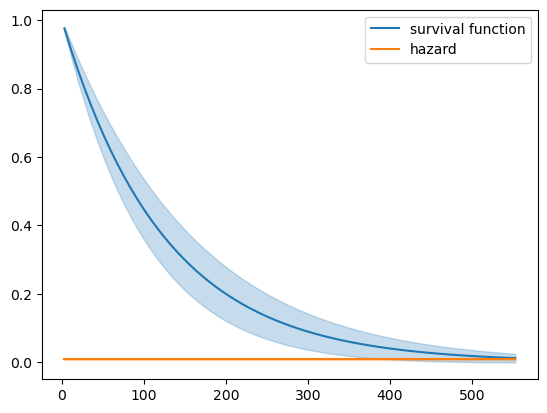

In [ ]:
epf.plot_survival_function(label='survival function').legend()
epf.plot_hazard(label='hazard').legend()

<AxesSubplot:>

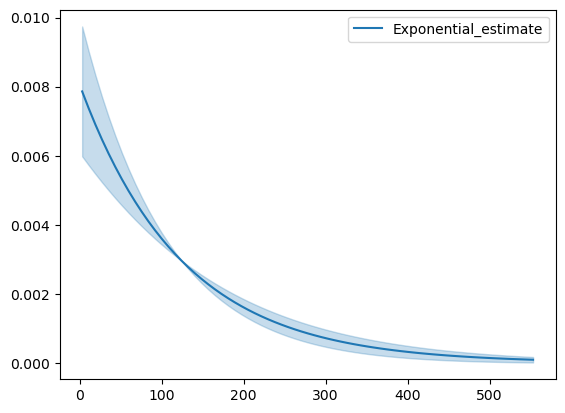

In [ ]:
epf.plot_density()

<AxesSubplot:>

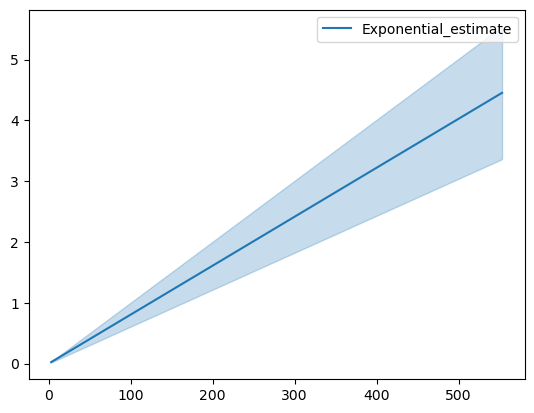

In [ ]:
epf.plot_cumulative_hazard()

<AxesSubplot:>

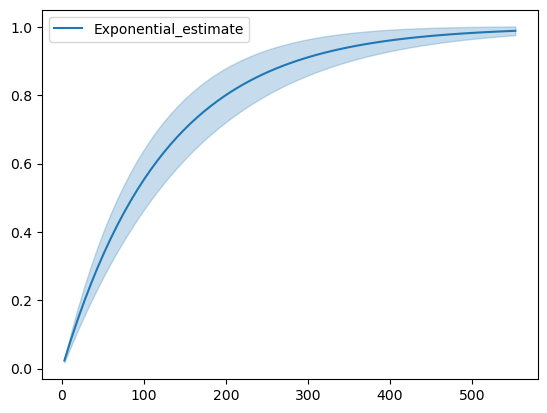

In [ ]:
epf.plot_cumulative_density()

In [ ]:
epf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,69,69
3.0,1,1,0,0,69
4.0,1,1,0,0,68
7.0,1,1,0,0,67
8.0,2,2,0,0,66
...,...,...,...,...,...
314.0,1,1,0,0,5
384.0,1,1,0,0,4
392.0,1,1,0,0,3


In [ ]:
#from sklearn

In [ ]:
pandas_profiling.version.__version__

'2.9.0'

In [ ]:
profile = ProfileReport(df, title="Reporte de veteranos")

In [ ]:
profile

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile.to_file(output_file='veteranos_EDA.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Análisis bivariado

+ Usar jointplot de seaborn para gráficas bivariadas con distribuciones marginales univariadas

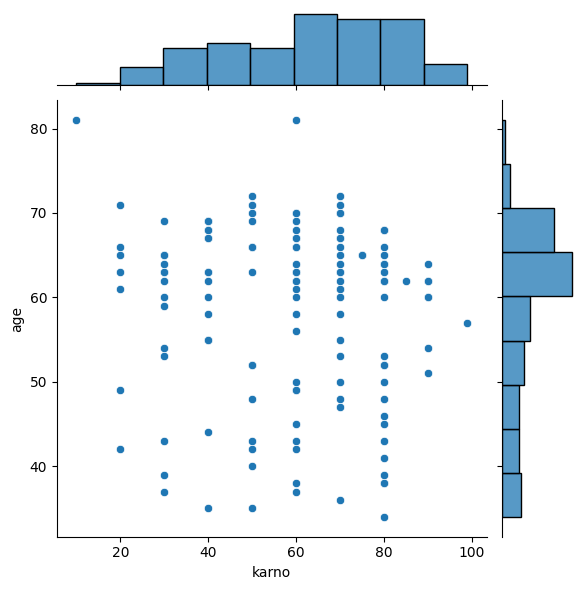

In [50]:
sns.jointplot(data=df, x="karno", y="age")

### Interpretación

In [ ]:
df.columns

Index(['trt', 'celltype', 'time', 'status', 'karno', 'diagtime', 'age',
       'prior'],
      dtype='object')

(0.0, 1300.0)

(0.0, 100.0)

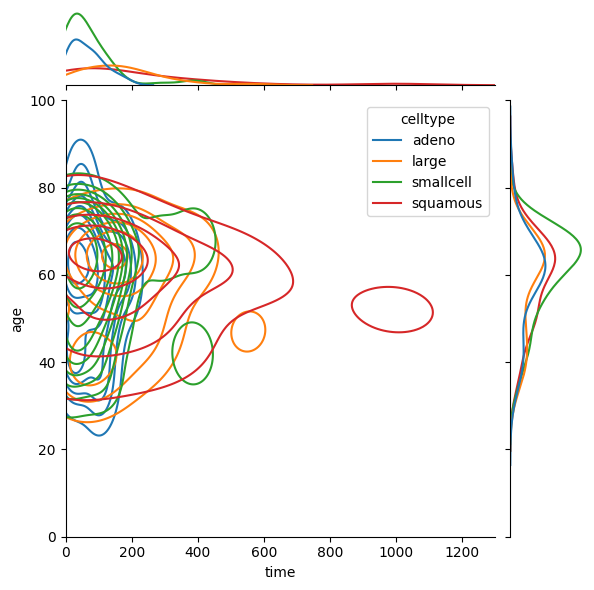

In [53]:
plot = sns.jointplot(data=df, x="time", y="age", hue="celltype",kind="kde")
plot.ax_marg_x.set_xlim(0, 1300)
plot.ax_marg_y.set_ylim(0, 100)





### Interpretación

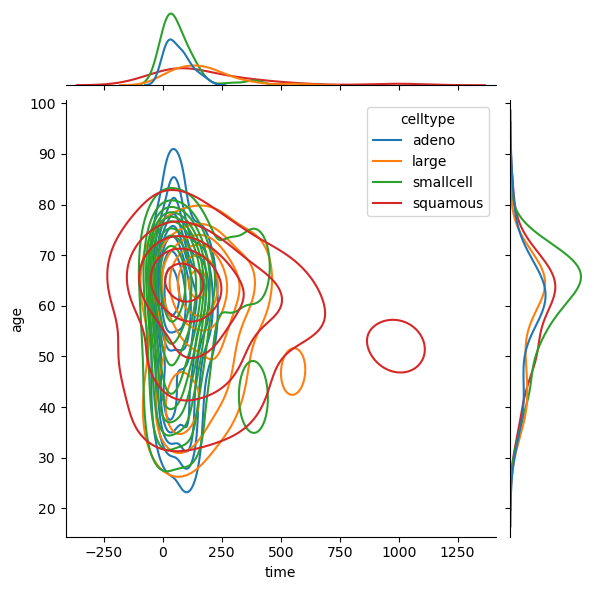

In [ ]:
sns.jointplot(data=df, x="time", y="age", hue="celltype",kind="kde")


### Interpretación

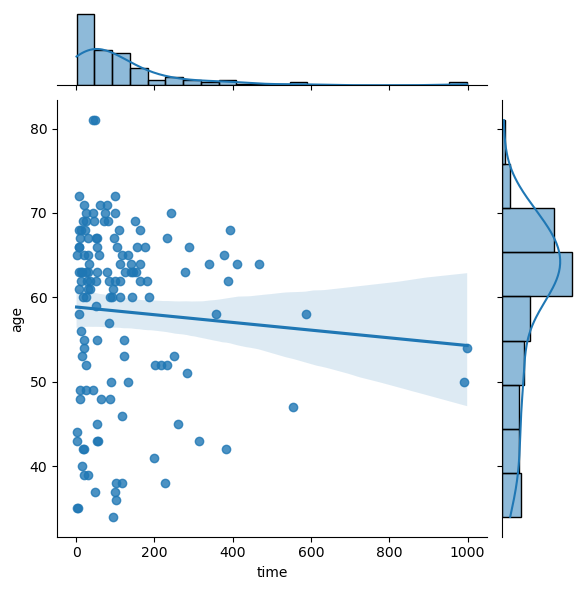

In [ ]:
sns.jointplot(data=df, x="time", y="age",kind="reg")

### Interpretación

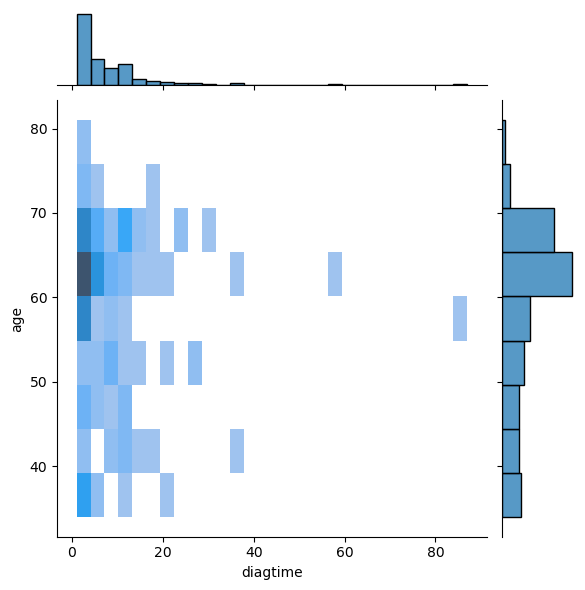

In [ ]:
sns.jointplot(data=df, x="diagtime", y="age",kind="hist")

### Interpretación